<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
</center>
<center>Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center> Capstone проект №1. Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [151]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import pickle
from tqdm import tqdm
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt

import IPython
def display(*dfs):
    for adf in dfs:
        IPython.display.display(df)

In [152]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = 'capstone_user_identification/' 

In [185]:
from collections import defaultdict
import re

# ini function from week1
def prepare_train_set(path_to_csv_files, session_length=10):
    counter_site = defaultdict(int)
    results = pd.DataFrame()

    for file_name in tqdm(glob(path_to_csv_files+'/*')):
        df = pd.read_csv(file_name)
        counter = df.site.value_counts().to_dict()
        print(counter)
        for key in counter.keys(): ## count docs woth site in all corpus
            counter_site[key] += counter[key]

        df['group'] = df.index//session_length
        df.sort_values('timestamp', inplace=True)
        df = df.groupby('group').site.agg(lambda x: {i: val 
                                                        for i, val in zip(range(1,session_length+1),
                                                                          x.T)})
        df = pd.DataFrame(df.to_list())
        df['user'] = int(re.findall(r'user(\d\d\d\d)', file_name)[0])
        results = results.append(df, ignore_index=True)

    num_to_site = pd.Series(counter_site).sort_values(ascending=False).reset_index()
    num_to_site.index += 1
    num_to_site = num_to_site['index'].to_dict()

    site_to_num = {v: k for k,v in num_to_site.items()}

    for col in results.drop('user',axis=1).columns:
        results[col] = results[col].map(site_to_num)
    results.fillna(0, inplace=True)

    return results, {site: (site_id, counter_site[site]) for site, site_id in site_to_num.items()}

# docs = [["hello", "world", "hello"], ["goodbye", "cruel", "world"]]

def get_sparse(docs):
    indptr = [0]
    indices = []
    data = []
    vocabulary = {}
    for d in docs:
        for term in d:
#             if term == 0: continue
            index = vocabulary.setdefault(term, term)
            indices.append(index)
            data.append(1)

        indptr.append(len(indices))
#     print(indices)
    return csr_matrix((data, indices, indptr), dtype=int)[:,1:]

In [234]:
# site_freq_path =  os.path.join(PATH_TO_DATA,'site_freq_3users.pkl')
# path_to_csv_files =os.path.join( PATH_TO_DATA,'3users')
# window_size=3
# session_lenght=2
                 

# counter_site = defaultdict(int)
# results = pd.DataFrame()
# with open(site_freq_path, 'rb') as file_site:
#     site_to_num = pickle.load(file_site)
# site_to_num = {k:v[0] for k,v in site_to_num.items()}

# for file_name in tqdm(glob(path_to_csv_files+'/*')):
#     df = pd.read_csv(file_name)
#     df.site = df.site.map(site_to_num)
#     n = df.shape[0] // window_size
#     for i in range(n):
#         df = df.merge(df.iloc[:, 1+i].shift(-window_size,fill_value=0),
#                       left_index=True, right_index=True)
#     df = df.T
#     df['user'] = int(re.findall(r'user(\d\d\d\d)', file_name)[0])
#     df.drop(index=['timestamp'], inplace=True)
    
#     results = results.append(df.iloc[:, list(range(session_lenght))+[-1]],
#                              ignore_index=True)
# results


In [310]:
import pickle

def prepare_sparse_train_set_window(path_to_csv_files, 
                                    site_freq_path, 
                                    session_length=10, 
                                    window_size=10):

    results = np.zeros((session_length,))
    y = []
    with open(site_freq_path, 'rb') as file_site:
        site_to_num = pickle.load(file_site)
    site_to_num = {k:v[0] for k,v in site_to_num.items()}
    
    for file_name in glob(path_to_csv_files+'/*'):
        df = pd.read_csv(file_name)
        df.site = df.site.map(site_to_num)
        
        n = int(np.ceil(df.shape[0] /window_size).item())
        temp = df.site.values
        temp = np.append(temp, np.zeros(session_length-temp.shape[0]%window_size,))
        temp = np.lib.stride_tricks.as_strided(temp, shape=(n, session_length),
                                       strides=(8*window_size, 8))
        results = np.vstack([results, temp])
        y.extend(n*[int(re.findall(r'user(\d\d\d\d)', file_name)[0])])
        
    return get_sparse(results[1:, :]), np.array(y)
 

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [311]:
# X_toy_s5_w3, y_s5_w3 = 
prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'),
                                       session_length=5, window_size=3)

(<12x11 sparse matrix of type '<class 'numpy.int64'>'
 	with 49 stored elements in Compressed Sparse Row format>,
 array([2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3]))

timestamp,site
2013-11-15 09:28:17,vk.com
2013-11-15 09:33:04,oracle.com
2013-11-15 09:52:48,oracle.com
2013-11-15 11:37:26,geo.mozilla.org
2013-11-15 11:40:32,oracle.com
2013-11-15 11:40:34,google.com
2013-11-15 11:40:35,accounts.google.com
2013-11-15 11:40:37,mail.google.com
2013-11-15 11:40:40,apis.google.com
2013-11-15 11:41:35,plus.google.com
2013-11-15 12:40:35,vk.com
2013-11-15 12:40:37,google.com
2013-11-15 12:40:40,google.com
2013-11-15 12:41:35,google.com


In [305]:
X_toy_s5_w3.todense()

matrix([[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [306]:
y_s5_w3

array([2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3])

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [312]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in tqdm(itertools.product([10, 7, 5], [15, 10, 7, 5])):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            X_sparse, y = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,f'{num_users}users'), 
                                                       os.path.join(PATH_TO_DATA,f'site_freq_{num_users}users.pkl'),
                                       session_length, window_size)
            data_lengths.append(y.shape[0])                                      
            with open(os.path.join(PATH_TO_DATA, 
                       f'X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl'), 'wb') as sparse_file:
                pickle.dump(X_sparse, sparse_file, protocol=2)
            with open(os.path.join(PATH_TO_DATA, 
                       f'y_{num_users}users_s{session_length}_w{window_size}.pkl'), 'wb') as y_file:
                pickle.dump(y, y_file, protocol=2)


0it [00:00, ?it/s]
1it [00:00,  3.01it/s]
5it [00:00,  3.84it/s]
6it [00:01,  3.67it/s]
7it [00:01,  3.55it/s]
9it [00:02,  3.29it/s]
10it [00:02,  2.93it/s]
11it [00:02,  3.03it/s]
12it [00:03,  3.94it/s]

0it [00:00, ?it/s]
1it [00:15, 15.04s/it]
5it [00:32, 11.80s/it]
6it [00:48, 13.26s/it]
7it [01:03, 13.63s/it]
9it [01:20, 12.19s/it]
10it [01:37, 13.59s/it]
11it [01:53, 14.27s/it]
12it [02:08, 10.67s/it]

CPU times: user 2min 1s, sys: 640 ms, total: 2min 2s
Wall time: 2min 11s


**Запишите в файл *answer2_1.txt* все числа из списка *data_lengths* через пробел. Полученный файл будет ответом на 1 вопрос теста.**

In [314]:
def write_answer_to_file(answer, file_address):
    with open(file_address, 'w') as out_f:
        out_f.write(str(answer))

In [322]:
write_answer_to_file(' '.join([str(i) for i in data_lengths]),
                     'answer2_1.txt')

## Часть 2. Первичный анализ данных, проверка гипотез

In [324]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [325]:
train_df.head()

,1,2,3,4,5,6,7,8,9,10,user
session_id,,,,,,,,,,,
0,60,60,266,39,39,69,162,69,160,183,241
1,310,81,164,168,168,183,164,160,81,43,241
2,39,60,60,266,39,39,193,81,183,164,241
3,310,160,168,61,2,6,3,2,6,3,241
4,2,2603,3,1650,1650,2,3,2832,81,43,241


In [326]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
1       14061 non-null int64
2       14061 non-null int64
3       14061 non-null int64
4       14061 non-null int64
5       14061 non-null int64
6       14061 non-null int64
7       14061 non-null int64
8       14061 non-null int64
9       14061 non-null int64
10      14061 non-null int64
user    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [329]:
train_df['user'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user, dtype: int64

In [334]:
train_df.values[0, :-1]

array([ 60,  60, 266,  39,  39,  69, 162,  69, 160, 183])

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [330]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [331]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

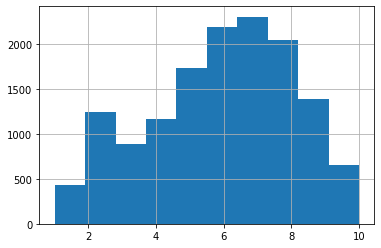

In [332]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально. Сделайте вывод. Ответом на второй вопрос в тесте будет файл со словом "YES" или "NO" в зависимости от того, распределено ли нормально число уникальных сайтов в сессии.**

In [335]:
import scipy.stats as ss
ss.shapiro(num_unique_sites)

(0.9546933174133301, 0.0)

((array([-3.89403843, -3.6734386 , -3.55253248, ...,  3.55253248,
          3.6734386 ,  3.89403843]), array([ 1,  1,  1, ..., 10, 10, 10])),
 (2.308739910778148, 5.951923760756702, 0.9770787039552055))

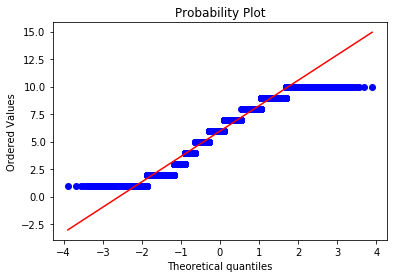

In [337]:
ss.probplot(num_unique_sites, plot=plt)

In [338]:
write_answer_to_file('NO', 
                     'answer2_2.txt')

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

In [341]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')
has_two_similar.shape

(14061,)

In [359]:
has_two_similar.sum(), has_two_similar.shape[0]

(13410, 14061)

In [362]:
pi_val = ss.binom_test(has_two_similar.sum(), has_two_similar.shape[0],
                       p=0.95, alternative='greater')
pi_val

0.02207653769072678

In [363]:
write_answer_to_file(0.02207653769072678, 
                     'answer2_3.txt')

**Постройте для этой доли 95% доверительный интервал Уилсона. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_4.txt*. Это будет ответом на 4 вопрос теста.**

In [366]:
wilson_interval = proportion_confint(
    has_two_similar.sum(),has_two_similar.shape[0],
    method = 'wilson')
wilson_interval

(0.9501028841411286, 0.9570527377232229)

In [367]:
write_answer_to_file('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)), 
                     'answer2_4.txt')

**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [388]:
site_freqs = pickle.load(open(os.path.join(PATH_TO_DATA, 'site_freq_10users.pkl'),'rb')
                        )
site_freqs = pd.DataFrame([[k, v[0], v[1]] for k,v in site_freqs.items()],
                          columns=['site','site_id', 'freq'])
                         
site_freqs

,site,site_id,freq
0,s.youtube.com,1,8300
1,www.google.fr,2,7813
2,www.google.com,3,5441
3,mail.google.com,4,4158
4,www.facebook.com,5,4141
...,...,...,...
4908,dz-telecharger.blogspot.com,4909,1
4909,88.docs.google.com,4910,1
4910,knut.hinkelmann.ch,4911,1
4911,accessmodifier.sourceforge.net,4912,1


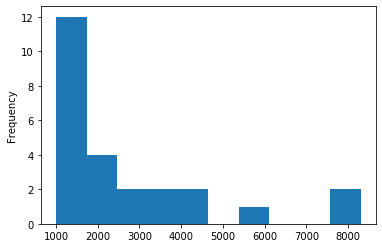

In [384]:
site_freqs[site_freqs.freq >= 1000].freq.plot(kind='hist')

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

In [386]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(ranresdom_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [387]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [393]:
res = list(map(np.mean, 
         get_bootstrap_samples(site_freqs.freqres.values, 
                               site_freqs.shape[0])
        ))

In [399]:
res = np.round(stat_intervals(res, 0.05), 3)

In [402]:
write_answer_to_file('{} {}'.format(*res), 
                                    'answer2_5.txt')

## Пути улучшения
В этом проекте свобода творчества на каждом шаге, а 7 неделя проекта посвящена общему описанию (`html`, `ipynb` или `pdf`) и взаимному оцениванию проектов. Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/identify-me-if-you-can4) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.